___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
plt.rcParams["figure.figsize"] = (10,6)
sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)
# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("drive/MyDrive/Colab_Files/data/Churn_Modelling.csv")

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [ ]:
df.shape

(10000, 14)

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [ ]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

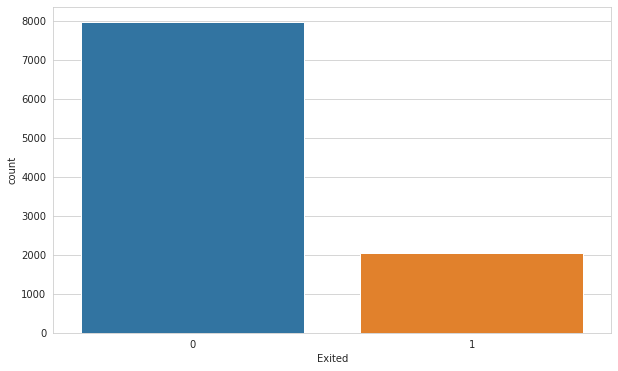

In [ ]:
sns.countplot(df["Exited"])

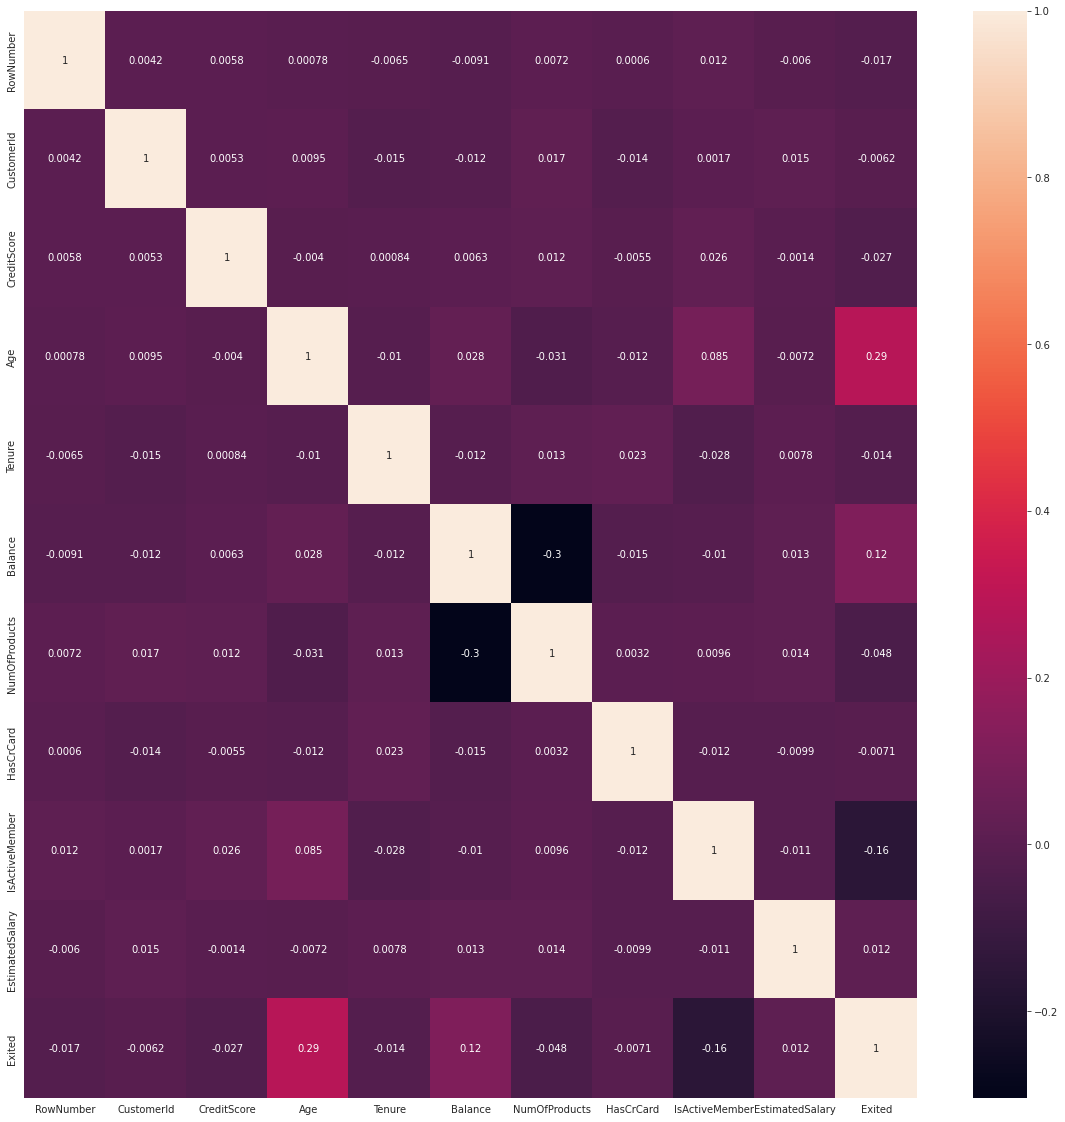

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True);

In [ ]:
drop_list = ["RowNumber", "CustomerId", "Surname"]

In [ ]:
df=df.drop(drop_list, axis=1)

In [ ]:
df.shape

(10000, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [ ]:
transformer = make_column_transformer(
    (OneHotEncoder(), ['Geography', 'Gender']),
    remainder='passthrough')

transformed = transformer.fit_transform(df)
transformed_df = pd.DataFrame(
    transformed, 
    columns=transformer.get_feature_names()
)

In [ ]:
transformed_df.head()

,onehotencoder__x0_France,onehotencoder__x0_Germany,onehotencoder__x0_Spain,onehotencoder__x1_Female,onehotencoder__x1_Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1.000,0.000,0.000,1.000,0.000,619.000,42.000,2.000,0.000,1.000,1.000,1.000,101348.880,1.000
1,0.000,0.000,1.000,1.000,0.000,608.000,41.000,1.000,83807.860,1.000,0.000,1.000,112542.580,0.000
2,1.000,0.000,0.000,1.000,0.000,502.000,42.000,8.000,159660.800,3.000,1.000,0.000,113931.570,1.000
3,1.000,0.000,0.000,1.000,0.000,699.000,39.000,1.000,0.000,2.000,0.000,0.000,93826.630,0.000
4,0.000,0.000,1.000,1.000,0.000,850.000,43.000,2.000,125510.820,1.000,1.000,1.000,79084.100,0.000


# Preprocessing of Data
- Train | Test Split, Scalling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X = transformed_df.drop('Exited', axis=1)
y = transformed_df['Exited']

In [ ]:
seed = 42

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.10, random_state = seed)

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [ ]:
X_train.shape

(9000, 13)

In [ ]:
X_test.shape

(1000, 13)

## without class_weigth

### Create The Model

In [ ]:
tf.random.set_seed(seed)
model = Sequential()
model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(10, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(2, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

# metrics = ["accuracy"] : Bunu yazmak zorunda değiliz ama accuracy yi de görmek istersek bunu da yazabiliriz(recall vs de yazabiliriz)
# Early stop da ben val_loss a göre karar ver diyebilir ya da bunun yerine "accuracy" ye göre karar ver de diyebiliriz
# class chat soru: hocam bazen fit ederken bütün epoch larda aynı loss değeri çıktığı oluyor mu
0# John H : Sabit kalmaz çok küçük değişim olur. Ben hiç karşılaşmadım

0

In [ ]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose=1)
# verbose=1 : raporlama ile ilgili
# validation_split = 0.1 niye kullandık bunu? Çünkü nasıl bir değişim olduğunu, overfit e gidiyor mu gitmiyor mu kontrol etmek için grafikte
# .. (loss_df.plot();) kod satırında
# Early stop yok şu anda 1000 epoch çalışacak

Epoch 1/1000
254/254 [==============================] - 2s 3ms/step - loss: 0.6168 - accuracy: 0.7757 - val_loss: 0.4811 - val_accuracy: 0.7989
Epoch 2/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.4738 - accuracy: 0.7960 - val_loss: 0.4523 - val_accuracy: 0.7989
Epoch 3/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.4588 - accuracy: 0.7960 - val_loss: 0.4372 - val_accuracy: 0.7989
Epoch 4/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4486 - accuracy: 0.7960 - val_loss: 0.4294 - val_accuracy: 0.7989
Epoch 5/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4406 - accuracy: 0.7960 - val_loss: 0.4181 - val_accuracy: 0.7989
Epoch 6/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4336 - accuracy: 0.7960 - val_loss: 0.4124 - val_accuracy: 0.7989
Epoch 7/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.4291 - accuracy: 0.7960 - val_loss: 0.4092 - val_accuracy:

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 20)                280       
                                                                 
 dense_6 (Dense)             (None, 10)                210       
                                                                 
 dense_7 (Dense)             (None, 4)                 44        
                                                                 
 dense_8 (Dense)             (None, 2)                 10        
                                                                 
 dense_9 (Dense)             (None, 1)                 3         
                                                                 
Total params: 547
Trainable params: 547
Non-trainable params: 0
_________________________________________________________________


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.617,0.776,0.481,0.799
1,0.474,0.796,0.452,0.799
2,0.459,0.796,0.437,0.799
3,0.449,0.796,0.429,0.799
4,0.441,0.796,0.418,0.799


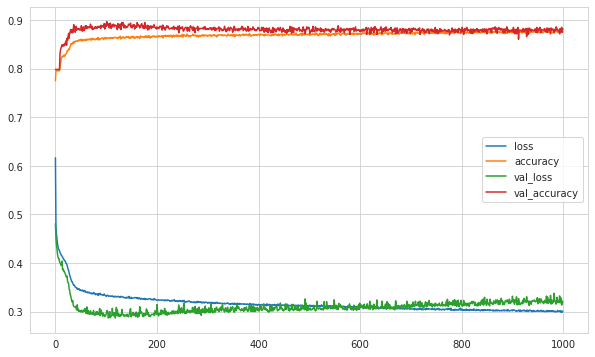

In [ ]:
loss_df.plot(); # train ve validation için sonuçlar
# x ekseninde 400 den sonra aralık açılıyor. Buna early stop atacağız aşağıda
# accuracy    : train datası accuracy
# val_accuracy: validation datası accuracy

# 2. ders
# John H: "Seed" kullanmanıza rağmen aynı sonuçlar gelmiyorsa;
# .. "stackoveflow: how-to-get-reproducible-results-in-keras" konusu incelenebilir

In [ ]:
model.evaluate(X_test, y_test, verbose=0)

[0.3612324893474579, 0.8569999933242798]

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3612324893474579
accuracy :  0.8569999933242798


In [ ]:
y_pred = model.predict(X_test) > 0.5  # ÖNEMLİ NOT: Tensorflow önceki versiyonlarında 0-1 sonuçlar üretiyordu.
# .. Yeni versiyonda üretmesi için > 0.5 diye bir eşik üretiyoruz burada(yapmamız gerekiyor(sigmoid için))
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 0 ve 1 in recall değerlerinin birbirine yakın olması, bize dengesizliğin olmadığını söylüyor
# Eğer dengesizlik olsaydı yukarda "class_weight" kullanarak modeli kurmamız gerekiyordu

[[758  38]
 [105  99]]
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91       796
         1.0       0.72      0.49      0.58       204

    accuracy                           0.86      1000
   macro avg       0.80      0.72      0.75      1000
weighted avg       0.85      0.86      0.85      1000



## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

In [ ]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

### Create The Model

In [ ]:
tf.random.set_seed(seed)
model = Sequential()
model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(10, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(2, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 1s 6ms/step - loss: 0.6955 - accuracy: 0.5831 - val_loss: 0.6928 - val_accuracy: 0.7967
Epoch 2/300
64/64 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.7947 - val_loss: 0.6930 - val_accuracy: 0.7967
Epoch 3/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.3969 - val_loss: 0.6933 - val_accuracy: 0.2044
Epoch 4/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.2112 - val_loss: 0.6936 - val_accuracy: 0.2011
Epoch 5/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.7516 - val_loss: 0.6934 - val_accuracy: 0.7411
Epoch 6/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.4442 - val_loss: 0.6984 - val_accuracy: 0.6044
Epoch 7/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6701 - accuracy: 0.6132 - val_loss: 0.6313 - val_accuracy: 0.6956
Epoch 8/300
6

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 20)                280       
                                                                 
 dense_11 (Dense)            (None, 10)                210       
                                                                 
 dense_12 (Dense)            (None, 4)                 44        
                                                                 
 dense_13 (Dense)            (None, 2)                 10        
                                                                 
 dense_14 (Dense)            (None, 1)                 3         
                                                                 
Total params: 547
Trainable params: 547
Non-trainable params: 0
_________________________________________________________________


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.696,0.583,0.693,0.797
1,0.694,0.795,0.693,0.797
2,0.694,0.397,0.693,0.204
3,0.694,0.211,0.694,0.201
4,0.693,0.752,0.693,0.741


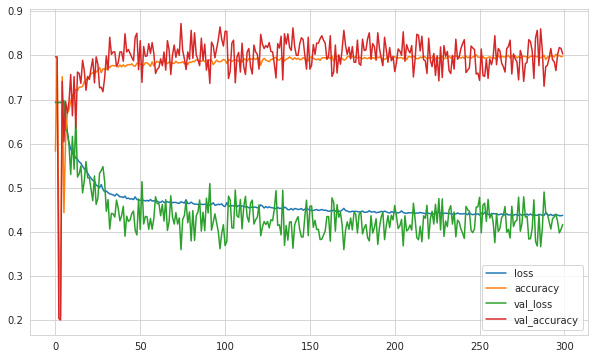

In [ ]:
loss_df.plot();

In [ ]:
model.evaluate(X_test, y_test, verbose=0)

[0.4498097598552704, 0.7839999794960022]

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.4498097598552704
accuracy :  0.7839999794960022


In [ ]:
y_pred = model.predict(X_test) > 0.5  # ÖNEMLİ NOT: Tensorflow önceki versiyonlarında 0-1 sonuçlar üretiyordu.
# .. Yeni versiyonda üretmesi için > 0.5 diye bir eşik üretiyoruz burada(yapmamız gerekiyor(sigmoid için))
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 0 ve 1 in recall değerlerinin birbirine yakın olması, bize dengesizliğin olmadığını söylüyor
# Eğer dengesizlik olsaydı yukarda "class_weight" kullanarak modeli kurmamız gerekiyordu

[[625 171]
 [ 45 159]]
              precision    recall  f1-score   support

         0.0       0.93      0.79      0.85       796
         1.0       0.48      0.78      0.60       204

    accuracy                           0.78      1000
   macro avg       0.71      0.78      0.72      1000
weighted avg       0.84      0.78      0.80      1000



## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
tf.random.set_seed(seed)
model = Sequential()
model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(10, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(2, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))
opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 1s 6ms/step - loss: 0.6955 - accuracy: 0.5831 - val_loss: 0.6928 - val_accuracy: 0.7967
Epoch 2/300
64/64 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.7947 - val_loss: 0.6930 - val_accuracy: 0.7967
Epoch 3/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.3969 - val_loss: 0.6933 - val_accuracy: 0.2044
Epoch 4/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.2112 - val_loss: 0.6936 - val_accuracy: 0.2011
Epoch 5/300
64/64 [==============================] - 0s 4ms/step - loss: 0.6934 - accuracy: 0.7516 - val_loss: 0.6934 - val_accuracy: 0.7411
Epoch 6/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.4442 - val_loss: 0.6984 - val_accuracy: 0.6044
Epoch 7/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6701 - accuracy: 0.6132 - val_loss: 0.6313 - val_accuracy: 0.6956
Epoch 8/300
6

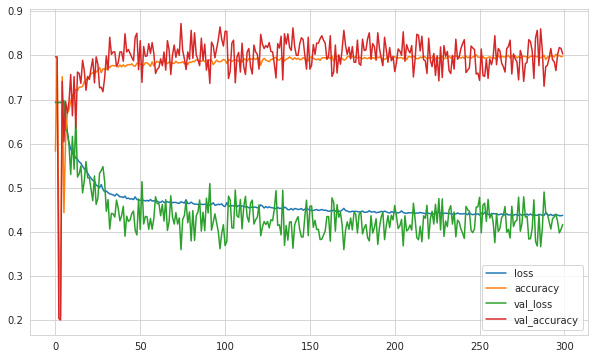

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

# Aynı accuracy sonucu verdi ama daha hızlı ulaşmış olduk.

loss :  0.4498097598552704
accuracy :  0.7839999794960022


In [ ]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
#

[[576 220]
 [ 40 164]]
              precision    recall  f1-score   support

         0.0       0.94      0.72      0.82       796
         1.0       0.43      0.80      0.56       204

    accuracy                           0.74      1000
   macro avg       0.68      0.76      0.69      1000
weighted avg       0.83      0.74      0.76      1000



### Add Dropout Layer

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
tf.random.set_seed(seed)
model = Sequential()
model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(4, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation = "sigmoid"))
opt = Adam(lr = 0.00001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 1s 6ms/step - loss: 0.7053 - accuracy: 0.7383 - val_loss: 0.6864 - val_accuracy: 0.7989
Epoch 2/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6944 - accuracy: 0.7796 - val_loss: 0.6887 - val_accuracy: 0.7989
Epoch 3/300
64/64 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.7891 - val_loss: 0.6908 - val_accuracy: 0.7989
Epoch 4/300
64/64 [==============================] - 0s 4ms/step - loss: 0.6938 - accuracy: 0.4952 - val_loss: 0.6918 - val_accuracy: 0.7989
Epoch 5/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.7917 - val_loss: 0.6911 - val_accuracy: 0.7989
Epoch 6/300
64/64 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5132 - val_loss: 0.6918 - val_accuracy: 0.7989
Epoch 7/300
64/64 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.7896 - val_loss: 0.6915 - val_accuracy: 0.7989
Epoch 8/300
6

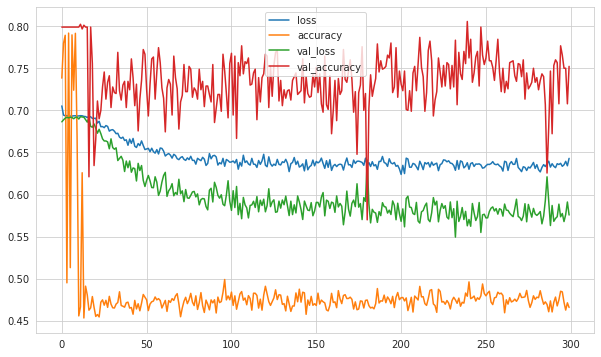

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

# Aynı accuracy sonucu verdi ama daha hızlı ulaşmış olduk.

loss :  0.5899381637573242
accuracy :  0.7400000095367432


In [ ]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
#

[[576 220]
 [ 40 164]]
              precision    recall  f1-score   support

         0.0       0.94      0.72      0.82       796
         1.0       0.43      0.80      0.56       204

    accuracy                           0.74      1000
   macro avg       0.68      0.76      0.69      1000
weighted avg       0.83      0.74      0.76      1000



### Add Early Stop

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
tf.random.set_seed(seed)
model = Sequential()
model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(4, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation = "sigmoid"))
opt = Adam(lr = 0.00001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

#### Monitor the "val_loss" as metric

In [ ]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)
# monitor = "val_loss" : val_loss a(minimumuna --> mode="min") bakarak early stop yap
# mode = "min": Genelde min ya da max tercih ediyoruz. Eğer monitor da accuracy kullansaydık model="max" olacaktı
# .. mode ="auto" da seçilebiliyor ama yanlış sonuçlar verebilir

In [ ]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 1s 6ms/step - loss: 0.7531 - accuracy: 0.6581 - val_loss: 0.7445 - val_accuracy: 0.2556
Epoch 2/300
64/64 [==============================] - 0s 3ms/step - loss: 0.7572 - accuracy: 0.6536 - val_loss: 0.7421 - val_accuracy: 0.2667
Epoch 3/300
64/64 [==============================] - 0s 3ms/step - loss: 0.7511 - accuracy: 0.6628 - val_loss: 0.7398 - val_accuracy: 0.2733
Epoch 4/300
64/64 [==============================] - 0s 4ms/step - loss: 0.7493 - accuracy: 0.6667 - val_loss: 0.7375 - val_accuracy: 0.2800
Epoch 5/300
64/64 [==============================] - 0s 3ms/step - loss: 0.7549 - accuracy: 0.6557 - val_loss: 0.7351 - val_accuracy: 0.2867
Epoch 6/300
64/64 [==============================] - 0s 3ms/step - loss: 0.7459 - accuracy: 0.6675 - val_loss: 0.7330 - val_accuracy: 0.2911
Epoch 7/300
64/64 [==============================] - 0s 3ms/step - loss: 0.7498 - accuracy: 0.6679 - val_loss: 0.7310 - val_accuracy: 0.3022
Epoch 8/300
6

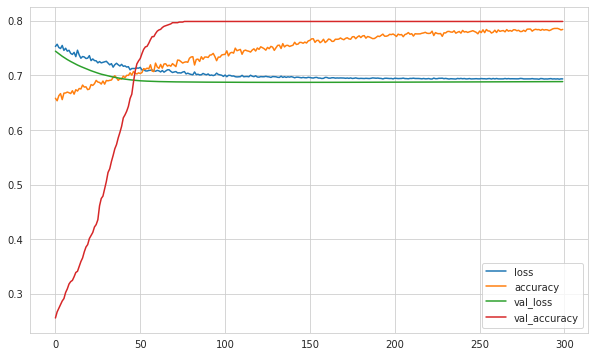

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

# Aynı accuracy sonucu verdi ama daha hızlı ulaşmış olduk.

loss :  0.6887338757514954
accuracy :  0.7960000038146973


#### Monitor the "val_recall" as metric

In [ ]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 15, restore_best_weights = True)
# monitor = "val_loss" : val_loss a(minimumuna --> mode="min") bakarak early stop yap
# mode = "min": Genelde min ya da max tercih ediyoruz. Eğer monitor da accuracy kullansaydık model="max" olacaktı
# .. mode ="auto" da seçilebiliyor ama yanlış sonuçlar verebilir

In [ ]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 0s 4ms/step - loss: 0.6937 - accuracy: 0.7833 - val_loss: 0.6887 - val_accuracy: 0.7989
Epoch 2/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.7851 - val_loss: 0.6887 - val_accuracy: 0.7989
Epoch 3/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.7848 - val_loss: 0.6887 - val_accuracy: 0.7989
Epoch 4/300
64/64 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.7870 - val_loss: 0.6887 - val_accuracy: 0.7989
Epoch 5/300
64/64 [==============================] - 0s 4ms/step - loss: 0.6943 - accuracy: 0.7822 - val_loss: 0.6887 - val_accuracy: 0.7989
Epoch 6/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.7852 - val_loss: 0.6888 - val_accuracy: 0.7989
Epoch 7/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.7848 - val_loss: 0.6888 - val_accuracy: 0.7989
Epoch 8/300
6

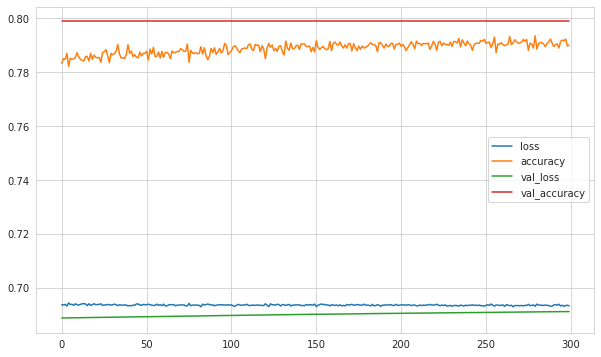

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

# Aynı accuracy sonucu verdi ama daha hızlı ulaşmış olduk.

loss :  0.6911097764968872
accuracy :  0.7960000038146973


## GridSearchCV

In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam # optimizer isimleri
# Adam  : Adaptive moment estimation
# Nadam : Nesterov-accelerated Adaptive Moment Estimation


In [ ]:
def build_classifier(optimizer, learn_rate):
    tf.random.set_seed(seed)
    classifier = Sequential()
    classifier.add(Dense(units = 20, activation = 'relu'))
    classifier.add(Dense(units = 10, activation = 'relu'))
    classifier.add(Dense(units = 4, activation = 'relu'))
    classifier.add(Dense(units = 2, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [ ]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [ ]:
classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 200)
parameters = {'batch_size': [32, 64],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003, 0.005]}
grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train, y_train, callbacks = [early_stop])
# NOT: # grid search yaparken early stop olsun mu olmasın mı gibi tartışmalar var

# Class chat soru: AF için grid search var mı hocam?
# John Hoca: Yapılabilir ama ben kullanmadım ancak model kurma kısmını farklı şekilde yapmak gerekebilir her bir katman için
# .. belki yapılmış olabilir daha önce

Fitting 10 folds for each of 24 candidates, totalling 240 fits
Epoch 1/200
127/127 [==============================] - 2s 5ms/step - loss: 0.5099 - accuracy: 0.7917 - val_loss: 0.4458 - val_accuracy: 0.7989
Epoch 2/200
127/127 [==============================] - 0s 3ms/step - loss: 0.4517 - accuracy: 0.7960 - val_loss: 0.4227 - val_accuracy: 0.7989
Epoch 3/200
127/127 [==============================] - 0s 3ms/step - loss: 0.4395 - accuracy: 0.7960 - val_loss: 0.4089 - val_accuracy: 0.7989
Epoch 4/200
127/127 [==============================] - 0s 3ms/step - loss: 0.4330 - accuracy: 0.7979 - val_loss: 0.4184 - val_accuracy: 0.8144
Epoch 5/200
127/127 [==============================] - 0s 3ms/step - loss: 0.4275 - accuracy: 0.8138 - val_loss: 0.4048 - val_accuracy: 0.8244
Epoch 6/200
127/127 [==============================] - 0s 3ms/step - loss: 0.4213 - accuracy: 0.8138 - val_loss: 0.3878 - val_accuracy: 0.8422
Epoch 7/200
127/127 [==============================] - 0s 3ms/step - loss: 0.41

GridSearchCV(cv=10,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f7c1de0c990>,
             n_jobs=-1,
             param_grid={'batch_size': [32, 64],
                         'learn_rate': [0.001, 0.003, 0.005],
                         'optimizer': [<class 'keras.optimizer_v2.adam.Adam'>,
                                       <class 'keras.optimizer_v2.rmsprop.RMSprop'>,
                                       <class 'keras.optimizer_v2.adadelta.Adadelta'>,
                                       <class 'keras.optimizer_v2.nadam.Nadam'>]},
             scoring='accuracy', verbose=1)

In [ ]:
grid_model.best_score_ # accuracy : 0.86

0.8612222222222223

In [ ]:
grid_model.best_params_ # default değerler geldi

{'batch_size': 64,
 'learn_rate': 0.005,
 'optimizer': keras.optimizer_v2.rmsprop.RMSprop}

In [ ]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]].sort_values(by="rank_test_score")
grid_result

# Class chat soru: Hocam rank_test_score neye göre belirleniyor
# John H: mean_test_score(accuracy) ye göre

,mean_test_score,std_test_score,rank_test_score,params
21,0.861,0.013,1,"{'batch_size': 64, 'learn_rate': 0.005, 'optim..."
17,0.860,0.014,2,"{'batch_size': 64, 'learn_rate': 0.003, 'optim..."
5,0.860,0.013,3,"{'batch_size': 32, 'learn_rate': 0.003, 'optim..."
20,0.859,0.012,4,"{'batch_size': 64, 'learn_rate': 0.005, 'optim..."
12,0.858,0.013,5,"{'batch_size': 64, 'learn_rate': 0.001, 'optim..."
7,0.858,0.015,6,"{'batch_size': 32, 'learn_rate': 0.003, 'optim..."
1,0.858,0.015,7,"{'batch_size': 32, 'learn_rate': 0.001, 'optim..."
23,0.857,0.012,8,"{'batch_size': 64, 'learn_rate': 0.005, 'optim..."
13,0.857,0.013,8,"{'batch_size': 64, 'learn_rate': 0.001, 'optim..."
9,0.857,0.014,10,"{'batch_size': 32, 'learn_rate': 0.005, 'optim..."


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [ ]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
# default değerler olduğu için aynı değerler geldi

# class chat soru : hocam gerçek hayatta random seed kullnamak mantıklı mı
# John H: Şu durumda mantıklı, learning rate i test etmek istiyorsam seed kullanmak mantıklı
# .. çünkü değişim learning rate den mi kaynaklanıyor yoksa ağırlıklardan mı kaynaklanıyor bilemeyiz tam
# .. Yani random seed yerine 10/30 kere çalıştırmak daha mantıklı.

[[754  42]
 [104 100]]
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91       796
         1.0       0.70      0.49      0.58       204

    accuracy                           0.85      1000
   macro avg       0.79      0.72      0.74      1000
weighted avg       0.84      0.85      0.84      1000



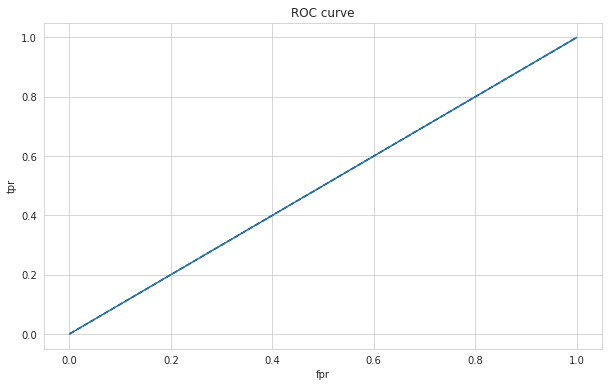

In [ ]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

# fpr(false pozitive ratio), tpr(true pozitive ratio), thresholds
# Ödevde sizinki inbalanced data olacağı için precision-recall curve bakabilirsiniz

In [ ]:
roc_auc_score(y_test, y_pred_proba)

0.5

# Final Model and Model Deployment

In [ ]:
import pickle
pickle.dump(scaler, open("model_bankingchurn", 'wb'))

In [ ]:
tf.random.set_seed(seed)
model = Sequential()
model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(10, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(2, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))
opt = tf.keras.optimizers.RMSprop(learning_rate=0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [132]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 64, epochs = 80, verbose = 1, class_weight=class_weights)

Epoch 1/80
141/141 [==============================] - 0s 3ms/step - loss: 0.4130 - accuracy: 0.8212 - val_loss: 0.5112 - val_accuracy: 0.7870
Epoch 2/80
141/141 [==============================] - 0s 3ms/step - loss: 0.4147 - accuracy: 0.8186 - val_loss: 0.5505 - val_accuracy: 0.7680
Epoch 3/80
141/141 [==============================] - 0s 3ms/step - loss: 0.4172 - accuracy: 0.8209 - val_loss: 0.5800 - val_accuracy: 0.7610
Epoch 4/80
141/141 [==============================] - 0s 3ms/step - loss: 0.4134 - accuracy: 0.8257 - val_loss: 0.5408 - val_accuracy: 0.7570
Epoch 5/80
141/141 [==============================] - 0s 3ms/step - loss: 0.4164 - accuracy: 0.8192 - val_loss: 0.5429 - val_accuracy: 0.7620
Epoch 6/80
141/141 [==============================] - 0s 3ms/step - loss: 0.4213 - accuracy: 0.8197 - val_loss: 0.5239 - val_accuracy: 0.7810
Epoch 7/80
141/141 [==============================] - 0s 3ms/step - loss: 0.4152 - accuracy: 0.8182 - val_loss: 0.5452 - val_accuracy: 0.7900
Epoch 

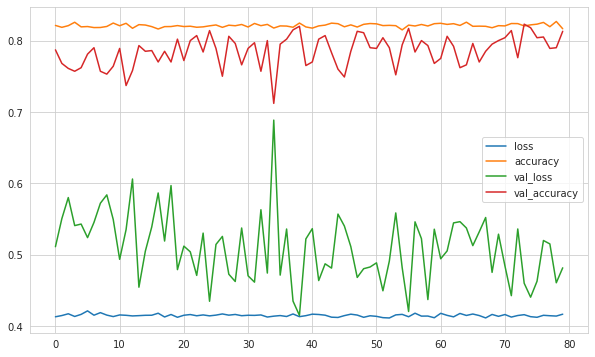

In [133]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [134]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.48158958554267883
accuracy :  0.8130000233650208


In [135]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
# Sonuçlar gayet iyi.  Bu sonuçları save edelim

[[679 117]
 [ 70 134]]
              precision    recall  f1-score   support

         0.0       0.91      0.85      0.88       796
         1.0       0.53      0.66      0.59       204

    accuracy                           0.81      1000
   macro avg       0.72      0.75      0.73      1000
weighted avg       0.83      0.81      0.82      1000



In [136]:
model.save('model_bankingchurn.h5') # save ettik. Scaler ı da yukarda dump etmiştik zaten

## Prediction

In [137]:
from tensorflow.keras.models import load_model

In [138]:
model_bankingchurn = load_model('model_bankingchurn.h5')
scaler_bankingchurn = pickle.load(open("model_bankingchurn", "rb"))

In [139]:
single_customer = transformed_df.drop('Exited', axis = 1).iloc[0:1, :]
single_customer # Sıfırıncı satırı prediction için kullanalım(Normalde çok sağlıklı değil bu datayı gördüğü için)

,onehotencoder__x0_France,onehotencoder__x0_Germany,onehotencoder__x0_Spain,onehotencoder__x1_Female,onehotencoder__x1_Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1.000,0.000,0.000,1.000,0.000,619.000,42.000,2.000,0.000,1.000,1.000,1.000,101348.880


In [140]:
single_customer = scaler_bankingchurn.transform(single_customer) # Scale imizi transform yapıyoruz yoksa sonuçlarımız yanlış gelir
single_customer

array([[1.        , 0.        , 0.        , 1.        , 0.        ,
        0.538     , 0.32432432, 0.2       , 0.        , 0.        ,
        1.        , 1.        , 0.50673489]])

In [141]:
(model_bankingchurn.predict(single_customer) > 0.5).astype("int32")
#model_bankingchurn.predict_classes(single_customer)

array([[1]], dtype=int32)

In [142]:
df["Exited"].iloc[0] # Prediction sonucu # 0. satırdaki sonuçta zaten 0 dı

1

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___